In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [73]:
data=pd.read_csv('C:/Users/HP/Downloads/stroke.csv')

In [74]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [75]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [76]:
data.shape

(5110, 12)

In [77]:
#checking missing values

data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [78]:
data.drop(labels="id",axis=1, inplace=True)

In [79]:
#handling missing values
data['bmi'].mean()

28.893236911794673

In [80]:
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

In [81]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [82]:
data.value_counts('stroke')

stroke
0    4861
1     249
dtype: int64

0 ...> no stroke

1 ...> stroke

In [83]:
data.groupby('stroke').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,41.971545,0.088871,0.047110,104.795513,28.825388
1,67.728193,0.265060,0.188755,132.544739,30.217789


In [84]:
index=['stroke','no stroke']

In [85]:
value=data['stroke'].value_counts()

([<matplotlib.patches.Wedge at 0x1e8ae829e50>,
 [Text(-1.0871361453364168, 0.16773491438301516, 'stroke'),
  Text(1.087136143373357, -0.1677349271061446, 'no stroke')],
 [Text(-0.5929833520016818, 0.09149177148164463, '95.1%'),
  Text(0.592983350930922, -0.0914917784215334, '4.9%')])

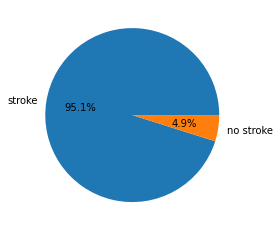

In [86]:
plt.pie(labels=index, x=value, autopct= '%1.1f%%')

<AxesSubplot:xlabel='stroke', ylabel='count'>

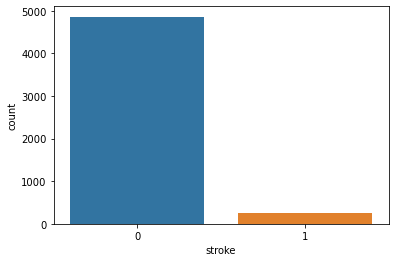

In [87]:
sns.countplot(x='stroke', data=data, )

# we have an imbalance dataset on our target feature

<AxesSubplot:xlabel='ever_married', ylabel='count'>

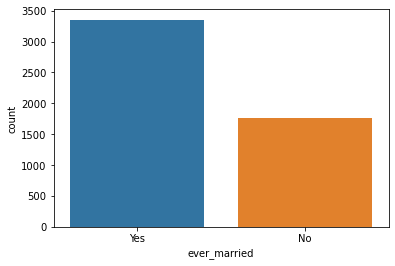

In [88]:
sns.countplot(x='ever_married',data=data)

<AxesSubplot:xlabel='work_type', ylabel='count'>

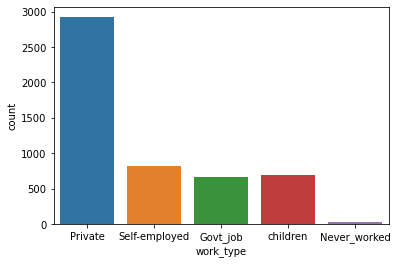

In [89]:
sns.countplot(x='work_type', data=data)

In [90]:
data.value_counts('Residence_type')

Residence_type
Urban    2596
Rural    2514
dtype: int64

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

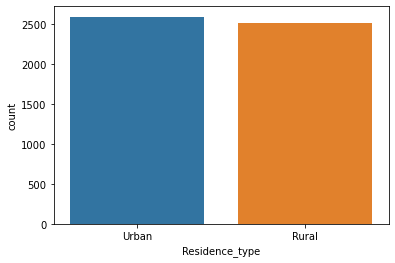

In [91]:
sns.countplot(x='Residence_type', data=data)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

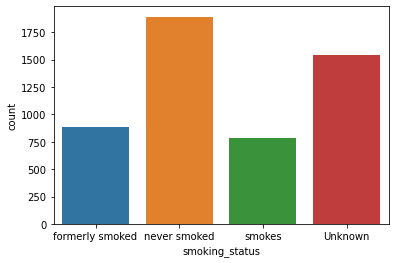

In [92]:
sns.countplot(x='smoking_status', data=data)

we have an imbalance dataset
we need to handle it

In [93]:
#seperating stroke from non stroke

n_stroke = data[data.stroke==0]
stroke= data[data.stroke==1]

In [94]:
print(n_stroke.shape)
print(stroke.shape)

(4861, 11)
(249, 11)


UnderSampling

Building of dataset sample containing similar distribution of stroke and non-stroke

number of diagnosed stroke is 249

In [95]:
n_stroke_sample= n_stroke.sample(n=249)

In [96]:
print(n_stroke_sample.shape)

(249, 11)


concatenate the two dataframe

In [97]:
new_data=pd.concat([n_stroke_sample,stroke], axis=0)

In [98]:
new_data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.900000,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.893237,Unknown,1
248,Female,78.0,0,0,Yes,Private,Rural,78.81,19.600000,Unknown,1


In [99]:
new_data.value_counts('stroke')

stroke
0    249
1    249
dtype: int64

In [100]:
new_data['gender']=new_data['gender'].replace({'Male':0,'Female':1})
new_data['ever_married']=new_data['ever_married'].replace({'Yes':0,'No':1})
new_data['work_type']=new_data['work_type'].replace({'Private':1,'Self-employed':2,'Govt_job':3,'children':4,'Never_worked':5})
new_data['Residence_type']=new_data['Residence_type'].replace({'Urban':0,'Rural':1})
new_data['smoking_status']=new_data['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':3,})


In [101]:
# new_data.value_counts('smoking_status')

In [102]:
new_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1059,0,61.0,0,0,0,1,1,204.50,35.100000,2,0
2904,1,31.0,0,0,0,1,0,82.18,42.700000,0,0
1249,0,15.0,0,0,1,1,1,78.59,25.100000,1,0
4043,1,13.0,0,0,1,4,1,88.51,27.700000,1,0
3309,0,36.0,0,0,0,1,0,56.42,29.600000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
244,0,57.0,0,0,0,1,1,84.96,36.700000,1,1
245,1,14.0,0,0,1,4,1,57.93,30.900000,1,1
246,1,75.0,0,0,0,2,1,78.80,29.300000,2,1
247,0,71.0,1,0,0,2,1,87.80,28.893237,1,1


In [103]:
new_data.to_csv('strokenew.csv', index=False)

In [104]:
X= new_data.iloc[:,:-1]
Y= new_data.iloc[:,-1]

STANDARDIZATION

In [105]:
std=StandardScaler()

In [106]:
standardize_x=std.fit_transform(X)

In [107]:
import pickle
file="stdfile.sav"
pickle.dump(std,open(file,"wb"))

In [108]:
X_train,X_test,Y_train,Y_test= train_test_split(standardize_x,Y,test_size=0.3,stratify=Y,random_state=1)

In [109]:
log=LogisticRegression()

In [110]:
log.fit(X_train,Y_train)

LogisticRegression()

In [111]:
y_pred=log.predict(X_test)

In [112]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
score = accuracy_score(Y_test,y_pred)

In [115]:
score

0.8066666666666666

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
knn=KNeighborsClassifier(n_neighbors=5)

In [118]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

In [119]:
k_pred=knn.predict(X_test)

In [120]:
score=accuracy_score(Y_test,k_pred)
score

0.6533333333333333

In [121]:
dec=DecisionTreeClassifier()


In [122]:
dec.fit(X_train,Y_train)

DecisionTreeClassifier()

In [123]:
decpred_y=dec.predict(X_test)

In [124]:
decscore = accuracy_score(Y_test,decpred_y)

In [125]:
decscore

0.7266666666666667

In [126]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_test,Y_test)

SVC()

In [127]:
s_pred=clf.predict(X_test)

In [128]:
s_score = accuracy_score(Y_test,s_pred)

In [129]:
s_score

0.8866666666666667

In [130]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
N_pred = gnb.fit(X_test, Y_test).predict(X_test)

In [131]:
N_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [132]:
N_score = accuracy_score(N_pred, Y_test)

In [133]:
N_score

0.78

In [134]:
from sklearn import tree

DT = tree.DecisionTreeRegressor()
DT.fit(X_test,Y_test)

DecisionTreeRegressor()

In [135]:
Dy_pred=DT.predict(X_test)

In [136]:
D_score = accuracy_score(Dy_pred, Y_test)
D_score

1.0

Random Forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
model = RandomForestClassifier()

model.fit(X_test,Y_test)

model_accuracy = model.score(X_test, Y_test)

In [139]:
model_accuracy

1.0

In [140]:
model_accuracy
print("Model Accuracy:" , model_accuracy * 100 , "%")

Model Accuracy: 100.0 %


In [141]:
import pickle
pickle.dump(gnb, open('stroke-model.sav' , 'wb'))

In [142]:

input_data=(0,19.0,0,0,1,2,1,82.07,29.0,0)

data_to_array= np.asarray(input_data)

data_reshaped= data_to_array.reshape(1,-1)

std_data=std.transform(data_reshaped)
print(std_data)

prediction= clf.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('the person is not a stroke patient')
else:
     print('the person is a stroke patient')

[[-1.1905779  -1.54370278 -0.47285011 -0.34511031  1.69129096  0.32436283
   0.99599197 -0.61857213 -0.03809064 -1.03896259]]
[0]
the person is not a stroke patient


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
